$$
\fbox{Projet Traitement du signal: Modualtion, démodulation, sous-échantillonage}
$$
$\underline{Julien~Louard~et~Maëlle~Thaller}$


I. Modulation et démodulation DSB-BC 

On utilisera dans la suite trois fréquences de référence d'ordres de grandeur différents: $B$ la fréquence maximale du signal à transmettre, $f_{c}>>B$ la fréquence de la porteuse, et $f_{\infty} >> B$ la fréquence d'échantillonage pour représenter les signaux analogiques ($f_{\infty}$ étant choisie "très grande", un signal échantillonné à $f_{\infty}$ peut être vu comme un signal à temps continu)


$\underline{A/Modulation}$
- Fabriquer le signal à transmettre $x(t)$, qui doit être à bande limitée $[-B,B]$ (utiliser éventuellement une fenêtre adaptée, par exemple de type Kaiser, pour éviter le "spectral leakage"); afficher le signal et son spectre
- Fabriquer le signal modulé $x_{m}(t) := x(t) cos(2 \pi f_{c}(t))$; afficher le signal et son spectre. Pourquoi le nom "DSB-SC" donné à ce type de modulation?

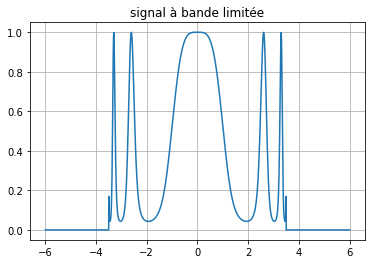

In [1]:
import numpy as np
from scipy import integrate
from math import *
import matplotlib.pyplot as plt

def f1(t,theta):
    return exp(t*cos(theta))

def I(t):
    '''fonction de bessel modifiée d'ordre 0'''
    res1,_=integrate.quad(f1,0,pi,args=(t))
    return (1/pi)*res1

def signal_atransmettre(t,alpha):
    '''on choisit une fenètre de type Kaiser'''
    if abs(t)<=B/2:
        return I(pi*alpha*sqrt(1-(2*t/B)**2))/I(pi*alpha)
    else:
        return 0
    
##affichage du signal
B=7
alpha=6
T=np.linspace(-6,6,1000)
Y=[signal_atransmettre(t,alpha) for t in T]
plt.grid(True)
plt.plot(T,Y)
plt.title('signal à bande limitée')
plt.show()

##affichage de son spectre/transformée de Fourier
